In [49]:
import json
import os
import re
from collections import defaultdict

import pandas as pd


In [50]:
def sort_dict_by_key(dictionary):
    sorted_dict = dict(
        sorted(dictionary.items(), key=lambda x: [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', x[0])]))
    return sorted_dict

In [51]:
results = defaultdict(lambda: defaultdict(list))
results_path = "../Results-MLPwAttention/"
for file in os.listdir(results_path):
    prefix = "probresult"
    if file[:len(prefix)] == prefix and file[-5:] == ".json":
        print(os.path.join(results_path, file))
        with open(os.path.join(results_path, file)) as f:
            result = json.load(f)
            result["file_name"] = file
            result["file_path"] = f.name
            results[(result["prob_model_variant"] if "prob_model_variant" in result else "") + result["X"]][
                result["Y"]].append(result)


../Results-MLPwAttention/probresult_XY_bool_CoEnv_X_TANL_layer_5_t5-base_epoch20_muc1700_epoch56_nhid800.json
../Results-MLPwAttention/probresult_multi_head22_Y_bucket_num_sent_muc1700_X_raw_layer_11_bert-uncased_epoch76_nhid800.json
../Results-MLPwAttention/probresult_Y_bucket_num_events_muc1700_X_TANL_layer_7_t5-base_epoch20_muc1700_epoch48_nhid200.json
../Results-MLPwAttention/probresult_multi_head22_Y_bucket_num_words_muc1700_X_raw_layer_7_bert-uncased_epoch64_nhid800.json
../Results-MLPwAttention/probresult_Y_bucket_num_words_muc1700_X_raw_layer_6_bert-uncased_epoch56_nhid200.json
../Results-MLPwAttention/probresult_multi_head11_Y_bucket_num_events_muc1700_X_TANL_layer_4_t5-base_epoch20_muc1700_epoch48_nhid400.json
../Results-MLPwAttention/probresult_Y_bucket_num_events_muc1700_X_TANL_layer_3_t5-base_epoch20_muc1700_epoch52_nhid400.json
../Results-MLPwAttention/probresult_Y_bucket_num_events_muc1700_X_TANL_layer_3_t5-base_epoch20_muc1700_epoch52_nhid800.json
../Results-MLPwAttenti

In [52]:
[(k, results[k].keys()) for k in results.keys()]

[('X_TANL_layer_5_t5-base_epoch20_muc1700',
  dict_keys(['XY_bool_CoEnv', 'XY_bool_coref', 'Y_bucket_num_sent_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700'])),
 ('multi_head22X_raw_layer_11_bert-uncased',
  dict_keys(['Y_bucket_num_sent_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700'])),
 ('X_TANL_layer_7_t5-base_epoch20_muc1700',
  dict_keys(['Y_bucket_num_events_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700', 'XY_bool_coref', 'XY_bool_CoEnv'])),
 ('multi_head22X_raw_layer_7_bert-uncased',
  dict_keys(['Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700', 'Y_bucket_num_sent_muc1700'])),
 ('X_raw_layer_6_bert-uncased',
  dict_keys(['Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700', 'Y_bucket_num_sent_muc1700', 'XY_bool_coref', 'XY_bool_CoEnv'])),
 ('multi_head11X_TANL_layer_4_t5-base_epoch20_muc1700',
  dict_keys(['Y_bucket_num_events_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700'])

In [53]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        sorted_values = sorted([(d['hidden_size'], d['val_acc']) for d in list_of_results], key=lambda p: p[0])
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        inner_dict[task_name] = [p[1] for p in sorted_values]
        inner_dict[task_name] = [str(p) + ("*" if p == max(inner_dict[task_name]) else "") for p in
                                 inner_dict[task_name]]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch20_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df_aligned = df.applymap(lambda l: l)  #[x.ljust(6) for x in l])

df_aligned.columns.name = "val acc of hidden size\n [100, 200, 400, 800]\nbert-uncased, muc1700\n * = best performance in cell"

In [54]:
df_aligned

"val acc of hidden size [100, 200, 400, 800] bert-uncased, muc1700 * = best performance in cell",Y_bucket_num_events_muc1700,XY_bool_CoEnv,Y_bucket_num_words_muc1700,Y_bucket_num_sent_muc1700,XY_bool_coref
X_GTT_layer_0_bert-uncased_epoch18_muc1700,"[0.635*, 0.615, 0.605, 0.62]","[0.5609065155807366, 0.5885269121813032*]","[0.595, 0.6*, 0.585, 0.565]","[0.42*, 0.42*, 0.38, 0.34]","[0.6978540772532189*, 0.6952789699570815]"
X_GTT_layer_1_bert-uncased_epoch18_muc1700,"[0.665, 0.66, 0.655, 0.67*]","[0.5446175637393768*, 0.5396600566572238]","[0.525, 0.535, 0.545, 0.555*]","[0.41*, 0.4, 0.395, 0.38]","[0.6944206008583691*, 0.6798283261802575]"
X_GTT_layer_2_bert-uncased_epoch18_muc1700,"[0.695*, 0.68, 0.69, 0.695*]","[0.546742209631728, 0.5594900849858357*]","[0.54*, 0.525, 0.54*, 0.535]","[0.44*, 0.42, 0.395, 0.39]","[0.6798283261802575*, 0.6763948497854078]"
X_GTT_layer_3_bert-uncased_epoch18_muc1700,"[0.665, 0.67, 0.675*, 0.67]","[0.5750708215297451*, 0.5587818696883853]","[0.51, 0.52, 0.515, 0.525*]","[0.42, 0.435*, 0.425, 0.41]","[0.6446351931330472, 0.6532188841201717*]"
X_GTT_layer_4_bert-uncased_epoch18_muc1700,"[0.69, 0.7*, 0.7*, 0.695]","[0.5616147308781869*, 0.556657223796034]","[0.545*, 0.54, 0.54, 0.545*]","[0.44*, 0.41, 0.44*, 0.43]","[0.6652360515021459, 0.6815450643776824*]"
...,...,...,...,...,...
multi_head22X_raw_layer_8_bert-uncased,[0.46*],NaN,[0.67*],[0.45*],NaN
multi_head22X_raw_layer_9_bert-uncased,[0.465*],NaN,[0.625*],[0.465*],NaN
multi_head22X_raw_layer_10_bert-uncased,[0.48*],NaN,[0.665*],[0.465*],NaN
multi_head22X_raw_layer_11_bert-uncased,[0.49*],NaN,[0.685*],[0.49*],NaN


In [55]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        sorted_values = sorted([(d['hidden_size'], d['test_acc']) for d in list_of_results], key=lambda p: p[0])
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        inner_dict[task_name] = [p[1] for p in sorted_values]
        inner_dict[task_name] = [str(p) + ("*" if p == max(inner_dict[task_name]) else "") for p in
                                 inner_dict[task_name]]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df_aligned = df.applymap(lambda l: l)  #[x.ljust(6) for x in l])

df_aligned.columns.name = "Test acc of hidden size\n [100, 200, 400, 800]\nbert-uncased, muc1700\n * = best performance in cell"

In [56]:
df_aligned

"Test acc of hidden size [100, 200, 400, 800] bert-uncased, muc1700 * = best performance in cell",Y_bucket_num_events_muc1700,XY_bool_CoEnv,Y_bucket_num_words_muc1700,Y_bucket_num_sent_muc1700,XY_bool_coref
X_GTT_layer_0_bert-uncased_epoch18_muc1700,"[0.535, 0.575, 0.6*, 0.54]","[0.5697492163009404, 0.5775862068965517*]","[0.575, 0.52, 0.585*, 0.55]","[0.425, 0.445*, 0.39, 0.39]","[0.7155443675267463, 0.723725613593455*]"
X_GTT_layer_1_bert-uncased_epoch18_muc1700,"[0.64, 0.65*, 0.635, 0.63]","[0.5893416927899686, 0.5979623824451411*]","[0.54, 0.54, 0.555, 0.585*]","[0.395, 0.41, 0.415*, 0.38]","[0.6532410320956576, 0.6664568911264946*]"
X_GTT_layer_2_bert-uncased_epoch18_muc1700,"[0.615, 0.63, 0.655, 0.66*]","[0.6206896551724138*, 0.6010971786833855]","[0.53, 0.575*, 0.575*, 0.53]","[0.42, 0.435*, 0.42, 0.435*]","[0.6337319068596602*, 0.6255506607929515]"
X_GTT_layer_3_bert-uncased_epoch18_muc1700,"[0.635, 0.625, 0.635, 0.655*]","[0.5956112852664577, 0.6144200626959248*]","[0.57*, 0.545, 0.56, 0.545]","[0.45*, 0.42, 0.425, 0.42]","[0.6897419760855884*, 0.6859660163624921]"
X_GTT_layer_4_bert-uncased_epoch18_muc1700,"[0.645, 0.64, 0.665*, 0.64]","[0.5893416927899686, 0.5979623824451411*]","[0.535*, 0.525, 0.505, 0.495]","[0.45*, 0.435, 0.44, 0.44]","[0.6626809314033983, 0.6752674638137193*]"
...,...,...,...,...,...
multi_head22X_raw_layer_8_bert-uncased,[0.47*],NaN,[0.71*],[0.41*],NaN
multi_head22X_raw_layer_9_bert-uncased,[0.445*],NaN,[0.66*],[0.425*],NaN
multi_head22X_raw_layer_10_bert-uncased,[0.395*],NaN,[0.66*],[0.47*],NaN
multi_head22X_raw_layer_11_bert-uncased,[0.46*],NaN,[0.695*],[0.475*],NaN


In [57]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        size_to_test_acc = {d['hidden_size']: d['test_acc'] for d in list_of_results}
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        if 400 not in size_to_test_acc:
            print(embedding_layer_name, "not available in ",task_name, "of hid 400")
        else:
            inner_dict[task_name] = size_to_test_acc[400]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
#df_aligned = df.applymap(lambda l: [x.ljust(6) for x in l])

df.columns.name = "Test acc of hidden size 400\nbert-uncased, muc1700\n "
df

multi_head22X_raw_layer_11_bert-uncased not available in  Y_bucket_num_sent_muc1700 of hid 400
multi_head22X_raw_layer_11_bert-uncased not available in  Y_bucket_num_words_muc1700 of hid 400
multi_head22X_raw_layer_11_bert-uncased not available in  Y_bucket_num_events_muc1700 of hid 400
multi_head22X_raw_layer_7_bert-uncased not available in  Y_bucket_num_words_muc1700 of hid 400
multi_head22X_raw_layer_7_bert-uncased not available in  Y_bucket_num_events_muc1700 of hid 400
multi_head22X_raw_layer_7_bert-uncased not available in  Y_bucket_num_sent_muc1700 of hid 400
multi_head22X_TANL_layer_0_t5-base_epoch20_muc1700 not available in  Y_bucket_num_events_muc1700 of hid 400
multi_head22X_TANL_layer_0_t5-base_epoch20_muc1700 not available in  Y_bucket_num_words_muc1700 of hid 400
multi_head22X_TANL_layer_0_t5-base_epoch20_muc1700 not available in  Y_bucket_num_sent_muc1700 of hid 400
multi_head22X_GTT_layer_4_bert-uncased_epoch18_muc1700 not available in  Y_bucket_num_words_muc1700 of hid

"Test acc of hidden size 400 bert-uncased, muc1700",Y_bucket_num_events_muc1700,XY_bool_CoEnv,Y_bucket_num_words_muc1700,Y_bucket_num_sent_muc1700,XY_bool_coref
X_GTT_layer_0_bert-uncased_epoch18_muc1700,0.600,0.569749,0.585,0.390,0.715544
X_GTT_layer_1_bert-uncased_epoch18_muc1700,0.635,0.589342,0.555,0.415,0.653241
X_GTT_layer_2_bert-uncased_epoch18_muc1700,0.655,0.620690,0.575,0.420,0.633732
X_GTT_layer_3_bert-uncased_epoch18_muc1700,0.635,0.595611,0.560,0.425,0.689742
X_GTT_layer_4_bert-uncased_epoch18_muc1700,0.665,0.589342,0.505,0.440,0.662681
...,...,...,...,...,...
multi_head11X_raw_layer_8_bert-uncased,0.505,NaN,0.730,0.500,NaN
multi_head11X_raw_layer_9_bert-uncased,0.555,NaN,0.750,0.475,NaN
multi_head11X_raw_layer_10_bert-uncased,0.530,NaN,0.720,0.500,NaN
multi_head11X_raw_layer_11_bert-uncased,0.530,NaN,0.700,0.515,NaN


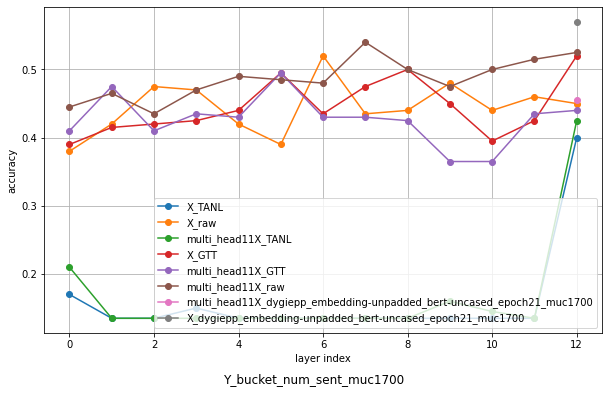

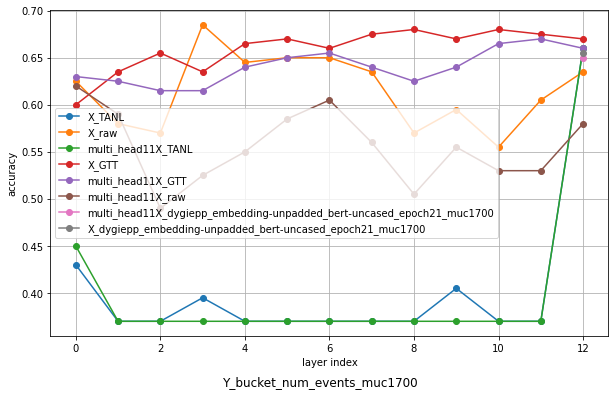

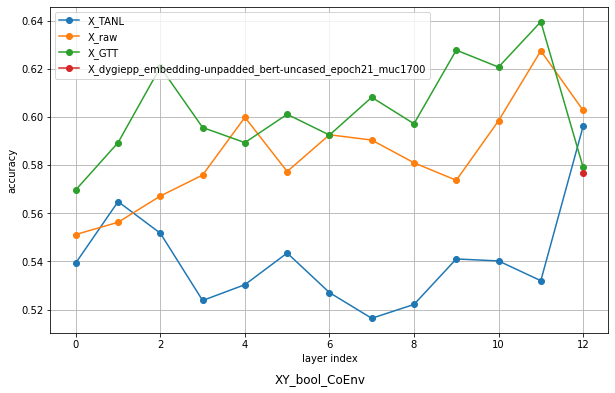

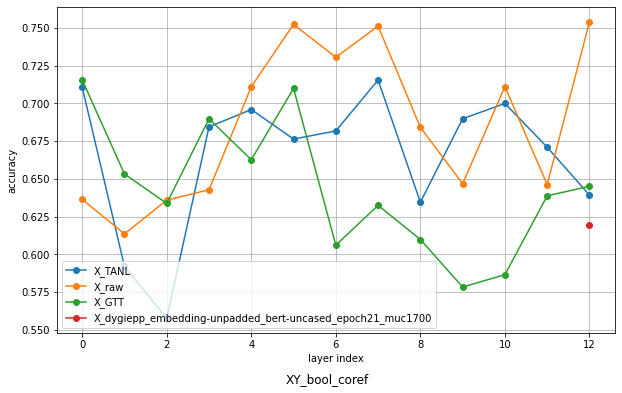

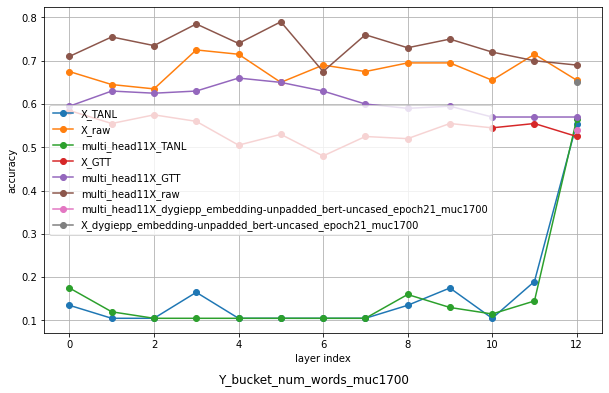

In [58]:
import matplotlib.pyplot as plt
graph_data = defaultdict(lambda: defaultdict(dict))
data = display_dict
# Extracting the unique test names
test_names = set()
for model_key in data:
    test_names.update(data[model_key].keys())

for test_name in test_names:
    for i, model_key in enumerate(data):
        if "layer_" not in model_key:
            layer_number = 12
        else:
            layer_name = model_key[model_key.index("layer_"):].split("_")[1]
            layer_number = 12 if layer_name == "last" else int(layer_name)
        if test_name not in data[model_key]:
            continue
        model_name = model_key[:model_key.index("_layer")] if "_layer" in model_key else model_key
        #model_name = model_name[model_name.index("_")+1 if "_" in model_name else 0:]
        graph_data[test_name][model_name][layer_number] = data[model_key][test_name]
        graph_data[test_name][model_name] = dict(sorted(graph_data[test_name][model_name].items(), key=lambda x: x[0]))

    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    x_values = {model: list(graph_data[test_name][model].keys()) for model in graph_data[test_name]}
    y_values = {model: list(graph_data[test_name][model].values()) for model in graph_data[test_name]}

    plt.xlabel('layer index')
    plt.ylabel('accuracy')
    plt.figtext(0.5, 0.01, test_name, wrap=True, horizontalalignment='center', fontsize=12)

    plt.grid(True)
    for model in graph_data[test_name]:
        plt.plot(x_values[model], y_values[model], label=model,marker='o')
        plt.legend()




In [28]:
next(results.values().__iter__()).keys()

dict_keys(['XY_bool_CoEnv', 'XY_bool_coref', 'Y_bucket_num_sent_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700'])

In [46]:
display_dict


{'TANL_layer_5_t5-base': {'XY_bool_CoEnv': 0.5435139573070608,
  'XY_bool_coref': 0.6763317599460553,
  'Y_bucket_num_sent_muc1700': 0.135,
  'Y_bucket_num_words_muc1700': 0.105,
  'Y_bucket_num_events_muc1700': 0.37},
 'lti_head22X_raw_layer_11_bert-uncase': {},
 'TANL_layer_7_t5-base': {'Y_bucket_num_events_muc1700': 0.37,
  'Y_bucket_num_words_muc1700': 0.105,
  'Y_bucket_num_sent_muc1700': 0.135,
  'XY_bool_coref': 0.7154416722859069,
  'XY_bool_CoEnv': 0.5164203612479474},
 'lti_head22X_raw_layer_7_bert-uncase': {},
 'raw_layer_6_bert-uncase': {'Y_bucket_num_words_muc1700': 0.69,
  'Y_bucket_num_events_muc1700': 0.65,
  'Y_bucket_num_sent_muc1700': 0.52,
  'XY_bool_coref': 0.7305045871559633,
  'XY_bool_CoEnv': 0.5925925925925926},
 'lti_head11X_TANL_layer_4_t5-base': {'Y_bucket_num_events_muc1700': 0.37,
  'Y_bucket_num_words_muc1700': 0.105,
  'Y_bucket_num_sent_muc1700': 0.135},
 'TANL_layer_3_t5-base': {'Y_bucket_num_events_muc1700': 0.395,
  'Y_bucket_num_sent_muc1700': 0.15,

In [29]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'model_name_layer_number' and 'test'
# containing the relevant data

# Extracting the layer number from the column names
df['layer_number'] = df['model_name_layer_number'].str.split('_').str[-1].astype(int)

# Sorting the DataFrame by layer number
df = df.sort_values('layer_number')

# Grouping the data by test
grouped_data = df.groupby('test')

# Creating a figure and axes for the plot
fig, ax = plt.subplots()

# Plotting the curve for each test
for test, group in grouped_data:
    ax.plot(group['layer_number'], group['test'], label=test)

# Adding labels and legend to the plot
ax.set_xlabel('Layer Number')
ax.set_ylabel('Test Value')
ax.legend()

# Displaying the plot
plt.show()

KeyError: 'model_name_layer_number'

In [30]:
display_dict = {}  # Create an empty dictionary to store the final result
from IPython.core.display import display, HTML


def path_to_image_html(path):
    if isinstance(path, str):
        return '<img src="' + path + '" style="width:100%;" >'


for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        size_to_results = {}
        for d in list_of_results:
            size_to_results[d['hidden_size']] = d
        if 400 not in size_to_results:
            continue
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        y_name = size_to_results[400]["Y"]
        variant = size_to_results[400]["prob_model_variant"] if "prob_model_variant" in size_to_results[400] else ""
        x_name = variant + size_to_results[400]["X"]
        epoch_str = size_to_results[400]["actual_epoch"]
        probing_classifier_width = size_to_results[400]["hidden_size"]

        inner_dict[task_name] = (os.path.join(results_path,
                                              size_to_results[400]["file_name"][:-5] + ".png"))
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[
                 :embedding_layer_name.index("_epoch") if "_epoch" in embedding_layer_name else -1]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df.columns.name = "Test acc of hidden size 400\nbert-uncased, muc1700\n "
df = df.applymap(path_to_image_html)

html_content = df.to_html(escape=False)
filename = "output1.html"

# Save the HTML string to a file
with open(filename, "w") as file:
    file.write(html_content)

# Open the HTML file in a web browser
import webbrowser

webbrowser.open("file://" + os.path.abspath(filename))

display(HTML(html_content))

"Test acc of hidden size 400 bert-uncased, muc1700",Y_bucket_num_events_muc1700,Y_bucket_num_words_muc1700,Y_bucket_num_sent_muc1700,XY_bool_CoEnv,XY_bool_coref
X_GTT_Sent_Epoch,,,,None,None
X_GTT_Sent_Epoch1,,,,None,None
X_GTT_Sent_Epoch2,,,,None,None
X_GTT_layer_0_bert-uncased,,,,,
X_GTT_layer_1_bert-uncased,,,,,
X_GTT_layer_2_bert-uncased,,,,,
X_GTT_layer_3_bert-uncased,,,,,
X_GTT_layer_4_bert-uncased,,,,,
X_GTT_layer_5_bert-uncased,,,,,
X_GTT_layer_6_bert-uncased,,,,,


In [ ]:
display_dict = {}  # Create an empty dictionary to store the final result
from IPython.core.display import display, HTML


def path_to_image_html(path):
    if isinstance(path, str):
        return '<img src="' + path + '" style="width:100%;" >'


for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    if "_1_" in embedding_layer_name or "_2_" in embedding_layer_name or "_3_" in embedding_layer_name or "_4_" in embedding_layer_name or "_5_" in embedding_layer_name or "_6_" in embedding_layer_name or "_7_" in embedding_layer_name or "_8_" in embedding_layer_name or "_9_" in embedding_layer_name or "_10_" in embedding_layer_name or "_11_" in embedding_layer_name:
        continue
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        size_to_results = {}
        for d in list_of_results:
            size_to_results[d['hidden_size']] = d

        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        y_name = size_to_results[400]["Y"]
        variant = size_to_results[400]["prob_model_variant"] if "prob_model_variant" in size_to_results[400] else ""
        x_name = variant + size_to_results[400]["X"]

        epoch_str = size_to_results[400]["actual_epoch"]
        probing_classifier_width = size_to_results[400]["hidden_size"]

        inner_dict[task_name] = (os.path.join(results_path,
                                              size_to_results[400]["file_name"][:-5] + ".png"))
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[
                 :embedding_layer_name.index("_epoch") if "_epoch" in embedding_layer_name else -1]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df.columns.name = "Test acc of hidden size 400\nbert-uncased, muc1700\n "
df = df.applymap(path_to_image_html)

html_content = df.to_html(escape=False)
filename = "output1.1.html"

# Save the HTML string to a file
with open(filename, "w") as file:
    file.write(html_content)

# Open the HTML file in a web browser
import webbrowser

webbrowser.open("file://" + os.path.abspath(filename))

display(HTML(html_content))